In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

In [2]:
data = pd.read_csv('car_age_price.csv')

In [3]:
data.shape

(112, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


# Linear Regression 

In [7]:
X = data.drop('Price', axis = 1)
Y = data['Price']

In [8]:
X.head()

,Year
0,2018
1,2019
2,2019
3,2018
4,2018


In [9]:
Y.head()

0    465000
1    755000
2    700000
3    465000
4    465000
Name: Price, dtype: int64

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42, test_size = 0.2)

In [11]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train, Y_train)
predictions = model.predict(X_test)
print('MSE =', mean_squared_error(Y_test,predictions))
print('R2 =', r2_score(Y_test,predictions))

MSE = 4326906256.829671
R2 = 0.36759313425902185


# Lasso Regression

In [12]:
lasso = Lasso(alpha = 1)
lasso.fit(X_train, Y_train)
y_pred1 = lasso.predict(X_test)
mean_squared_error_la = np.mean((y_pred1 - Y_test)**2)
print("Mean squared error on test set", mean_squared_error_la)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coeff)

Mean squared error on test set 4326859771.015669
  Columns  Coefficient Estimate
0    Year            47608.1556


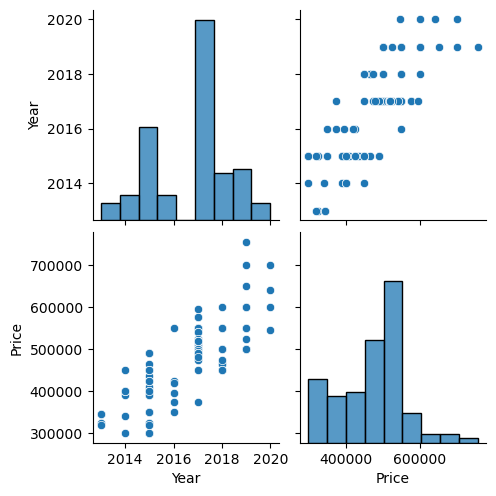

In [13]:
sns.pairplot(data)